# **Execution and Analysis Steps:**

### 1. **Dataset Overview and Visualization:**

- The script starts by loading the Sonar dataset, showcasing its shape, data types, a snippet of data, basic statistics, and class distribution.
- Visualizations like histograms, density plots, and correlation matrices help understand data distributions and relationships.

### 2. **Model Evaluation:**

- It evaluates multiple classifiers using cross-validation (CV) with 10 folds.
- The script assesses the performance of models such as Logistic Regression (LR), K-Nearest Neighbors (KNN), Decision Trees (CART), Support Vector Machines (SVM), etc., using accuracy as the metric.

### 3. **Algorithm Comparison:**

- The generated boxplots provide a visual comparison of different classifiers, showcasing their mean accuracy and variability across folds.

### 4. **Scaling and Tuning:**

- The script applies scaling and performs hyperparameter tuning for specific models like KNN and SVM to optimize their performance using GridSearchCV.

### 5. **Ensemble Methods:**

- It assesses ensemble methods like AdaBoost, Gradient Boosting, Random Forest, and Extra Trees through cross-validation and compares their accuracies.

### 6. **Model Finalization:**

- The best-performing model (SVM with specific hyperparameters) is trained on the entire training dataset and evaluated on a validation set.

# **Integrating ThunderSVM for Computational Analysis:**

### 1. **Replacing Scikit-learn's SVM with ThunderSVM:**

- Install ThunderSVM library and import its SVM implementation.
- Replace the existing Scikit-learn's SVM with ThunderSVM's SVM in the script.

### 2. **Measuring Computational Performance:**

- Time the execution of the script with Scikit-learn's SVM and ThunderSVM's SVM separately.
- Compare the execution times to understand the impact on computational performance.

### **Insights and Observations:**

- **Statistical Performance:** Assess the accuracy mean and standard deviation for each classifier to identify the best-performing model.
- **Visual Comparisons:** Use boxplots to visually compare the accuracies and variations among different models. This provides insights into consistency and overall performance.
- **Computational Performance:** Compare the execution times between Scikit-learn's SVM and ThunderSVM's SVM to understand any computational performance improvements or differences.

In [ ]:
# Load libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Load dataset
url = 'sonar.all-data.csv'
dataset = read_csv(url, header=None)

In [ ]:
# Summarize Data

# Descriptive statistics
# shape
print(dataset.shape)
# types
set_option('display.max_rows', 500)
print(dataset.dtypes)
# head
set_option('display.width', 100)
print(dataset.head(20))
# descriptions, change precision to 3 places
set_option('precision', 3)
print(dataset.describe())
# class distribution
print(dataset.groupby(60).size())

(208, 61)
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object
        0       1       2       3       4       5       6       7       8       9   ...      51  \
0   0.0200  0.0371  0.0

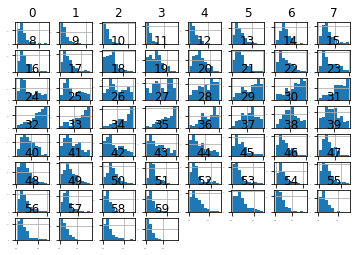

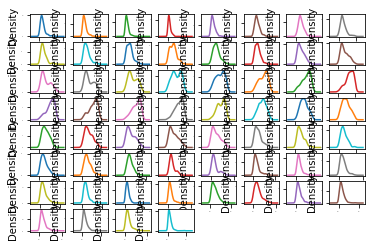

In [ ]:
# Data visualizations

# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
pyplot.show()


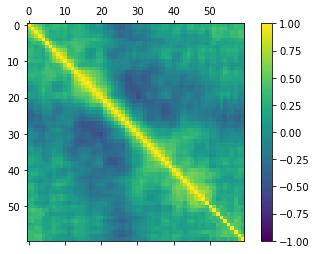

In [ ]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()


In [ ]:
# Prepare Data

# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [ ]:
# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds) #random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.723529 (0.115628)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


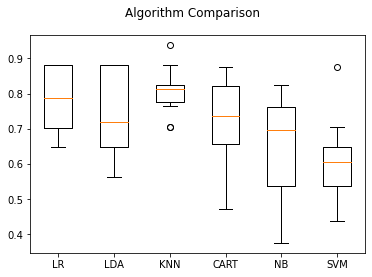

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds)#, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.734191 (0.095885)
ScaledLDA: 0.746324 (0.117854)
ScaledKNN: 0.825735 (0.054511)
ScaledCART: 0.723162 (0.070047)
ScaledNB: 0.648897 (0.141868)
ScaledSVM: 0.836397 (0.088697)


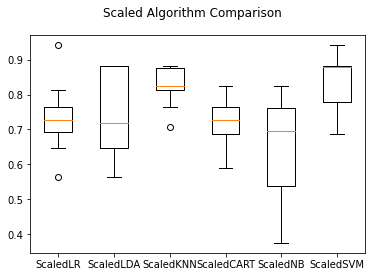

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)#, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)#, id=True)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850000 using {'n_neighbors': 1}
0.850000 (0.059686) with: {'n_neighbors': 1}
0.837132 (0.066014) with: {'n_neighbors': 3}
0.837500 (0.037377) with: {'n_neighbors': 5}
0.763971 (0.089374) with: {'n_neighbors': 7}
0.751471 (0.087051) with: {'n_neighbors': 9}
0.733456 (0.104831) with: {'n_neighbors': 11}
0.733088 (0.105806) with: {'n_neighbors': 13}
0.727941 (0.076148) with: {'n_neighbors': 15}
0.709926 (0.079287) with: {'n_neighbors': 17}
0.722059 (0.085088) with: {'n_neighbors': 19}
0.710294 (0.109505) with: {'n_neighbors': 21}


In [ ]:

# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds)#, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)#, iid=True)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: 0.866176 using {'C': 1.5, 'kernel': 'rbf'}
0.758456 (0.099483) with: {'C': 0.1, 'kernel': 'linear'}
0.529412 (0.118825) with: {'C': 0.1, 'kernel': 'poly'}
0.573162 (0.130930) with: {'C': 0.1, 'kernel': 'rbf'}
0.704044 (0.066933) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.746324 (0.109507) with: {'C': 0.3, 'kernel': 'linear'}
0.642647 (0.132187) with: {'C': 0.3, 'kernel': 'poly'}
0.765809 (0.091692) with: {'C': 0.3, 'kernel': 'rbf'}
0.734926 (0.054567) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.740074 (0.082636) with: {'C': 0.5, 'kernel': 'linear'}
0.680147 (0.098595) with: {'C': 0.5, 'kernel': 'poly'}
0.788235 (0.064190) with: {'C': 0.5, 'kernel': 'rbf'}
0.746691 (0.058742) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.746691 (0.084198) with: {'C': 0.7, 'kernel': 'linear'}
0.740074 (0.127908) with: {'C': 0.7, 'kernel': 'poly'}
0.812500 (0.085513) with: {'C': 0.7, 'kernel': 'rbf'}
0.752574 (0.058825) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.758824 (0.096520) with: {'C': 0.9, 'kernel': 'linear'

In [ ]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds)#, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


AB: 0.819853 (0.058293)
GBM: 0.830147 (0.094089)
RF: 0.752941 (0.082402)
ET: 0.817647 (0.111540)


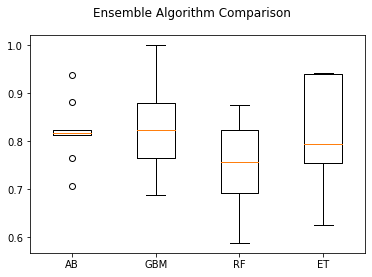

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [ ]:
# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(gamma='auto', C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))



0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42

